In [1]:
%pylab inline
import numpy as np
import pandas as pd
import scipy

Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [2]:
import sys
sys.path.append("../errortools/")
import errortools

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


# Fitting and predicting

In [3]:
ndim = 3
fit_intercept = True
ndata = 1000

w_true = [2, 0, -2, 0]

In [4]:
np.random.seed(42)
X = np.random.uniform(low=-1, high=1, size=ndim*ndata).reshape(ndata, ndim)
p = scipy.stats.logistic.cdf(np.dot(np.concatenate((X, np.ones((X.shape[0],1), dtype=float)), axis=1), w_true))
y = (p > np.random.uniform(size=ndata)).astype(int)

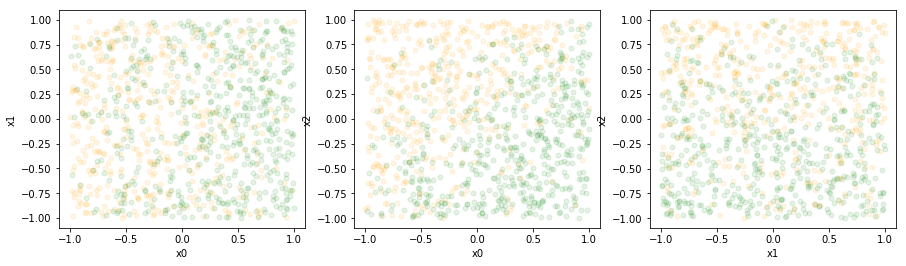

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(15,4))

ax[0].plot(X[y==0,0], X[y==0,1], 'o', color='orange', alpha=0.1, markersize=5)
ax[0].plot(X[y==1,0], X[y==1,1], 'o', color='green',  alpha=0.1, markersize=5)
ax[0].set_xlabel("x0")
ax[0].set_ylabel("x1")

ax[1].plot(X[y==0,0], X[y==0,2], 'o', color='orange', alpha=0.1, markersize=5)
ax[1].plot(X[y==1,0], X[y==1,2], 'o', color='green',  alpha=0.1, markersize=5)
ax[1].set_xlabel("x0")
ax[1].set_ylabel("x2")

ax[2].plot(X[y==0,1], X[y==0,2], 'o', color='orange', alpha=0.1, markersize=5)
ax[2].plot(X[y==1,1], X[y==1,2], 'o', color='green',  alpha=0.1, markersize=5)
ax[2].set_xlabel("x1")
ax[2].set_ylabel("x2");

In [7]:
model = errortools.LogisticRegression(fit_intercept=True)

In [11]:
model.fit(X, y)

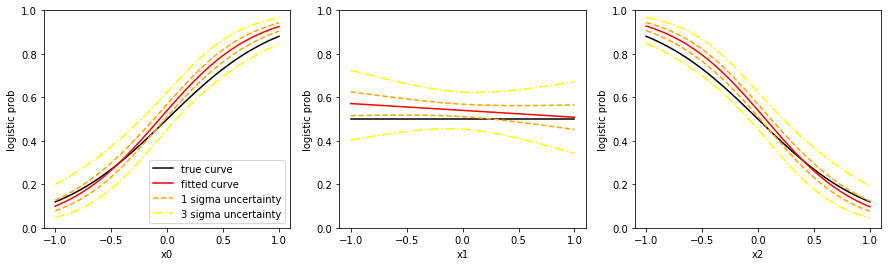

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(15,4))

nstddevs = 3

w = model.weights
cvr_mtx = model.cvr_mtx
prc_mtx = np.linalg.inv(cvr_mtx)

u = np.linspace(-1, 1, 100).reshape(-1,1)
a = np.zeros((100,1), dtype=float)

x = np.concatenate((u, a, a), axis=1)
f = model.predict(x)
el1, eu1 = model.estimate_errors(x, 1)
el3, eu3 = model.estimate_errors(x, 3)
g = scipy.stats.logistic.cdf(np.dot(np.concatenate((x,np.ones((x.shape[0],1))),axis=1), w_true))
ax[0].plot(u, g, '-', color='black', alpha=1, label="true curve")
ax[0].plot(u, f, '-', color='red', label="fitted curve")
ax[0].plot(u, f-el1, '--', color='orange', label="1 sigma uncertainty")
ax[0].plot(u, f+eu1, '--', color='orange')
ax[0].plot(u, f-el3, '-.', color='yellow', label="3 sigma uncertainty")
ax[0].plot(u, f+eu3, '-.', color='yellow')
ax[0].set_ylim((0,1))
ax[0].set_xlabel("x0")
ax[0].set_ylabel("logistic prob")
ax[0].legend()

x = np.concatenate((a, u, a), axis=1)
f = model.predict(x)
el1, eu1 = model.estimate_errors(x, 1)
el3, eu3 = model.estimate_errors(x, 3)
g = scipy.stats.logistic.cdf(np.dot(np.concatenate((x,np.ones((x.shape[0],1))),axis=1), w_true))
ax[1].plot(u, g, '-', color='black', alpha=1)
ax[1].plot(u, f, '-', color='red')
ax[1].plot(u, f-el1, '--', color='orange')
ax[1].plot(u, f+eu1, '--', color='orange')
ax[1].plot(u, f-el3, '-.', color='yellow')
ax[1].plot(u, f+eu3, '-.', color='yellow')
ax[1].set_ylim((0,1))
ax[1].set_xlabel("x1")
ax[1].set_ylabel("logistic prob")

x = np.concatenate((a, a, u), axis=1)
f = model.predict(x)
el1, eu1 = model.estimate_errors(x, 1)
el3, eu3 = model.estimate_errors(x, 3)
g = scipy.stats.logistic.cdf(np.dot(np.concatenate((x,np.ones((x.shape[0],1))),axis=1), w_true))
ax[2].plot(u, g, '-', color='black', alpha=1)
ax[2].plot(u, f, '-', color='red')
ax[2].plot(u, f-el1, '--', color='orange')
ax[2].plot(u, f+eu1, '--', color='orange')
ax[2].plot(u, f-el3, '-.', color='yellow')
ax[2].plot(u, f+eu3, '-.', color='yellow')
ax[2].set_ylim((0,1))
ax[2].set_xlabel("x2")
ax[2].set_ylabel("logistic prob");

# L1 Regularization

In [25]:
ndim = 2
fit_intercept = False
ndata = 100

w_true = [2, 2]

In [26]:
np.random.seed(42)
X = np.random.uniform(low=-1, high=1, size=2*ndata).reshape((ndata, 2))
p = scipy.stats.logistic.cdf(np.dot(X, w_true))
y = (p > np.random.uniform(size=ndata)).astype(int)

In [27]:
model = errortools.LogisticRegression(fit_intercept=False)

In [28]:
def grad(w, X, y, l1, l2):
    b = 0
    y_pred = 1./(1.+np.exp(-X.dot(w)-b))
    u = np.array([1 if v>0 else -1 for v in w])
    return np.sum((y_pred-y)[:,np.newaxis] * X, axis=0) + l1*u + l2*w
    

fitted pars: [1.62787989 2.00662423]
fitted pars: [7.48800126e-02 3.05226227e-14]
fitted pars: [1.79913149e-07 5.37155632e-14]


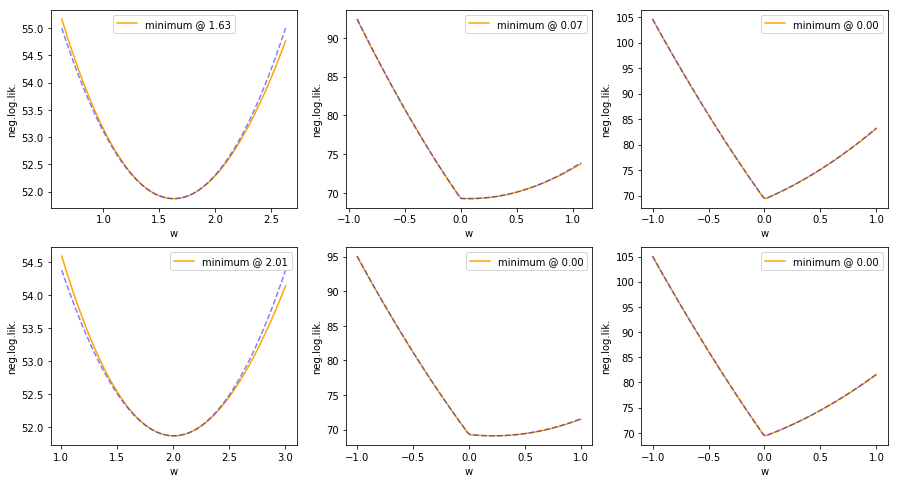

In [29]:
fig, ax = plt.subplots(2, 3, figsize=(15,8))



for i,l1 in enumerate([0, 10, 20]):
    try:
        model.fit(X, y, w0=[1,0], l1=l1)
    except:
        print("watch out")
        pass
    w_fit = model.minuit.np_values()
    hessian = 2*scipy.linalg.inv(model.minuit.np_matrix())
    print("fitted pars:",w_fit)
    nll = errortools.LogisticRegression.negativeLogPosterior(w_fit, X, y, 0, 0)

    w_array = np.concatenate((np.linspace(w_fit[0]-1, w_fit[0]+1, 100)[:,np.newaxis], np.full((100,1),w_fit[1])), axis=1)
    P = np.array([errortools.LogisticRegression.negativeLogPosterior(u, X, y, l1, 0) for u in w_array])
    ax[0,i].plot(w_array[:,0], P, color='orange', label="minimum @ %.2f"%(w_fit[0]))
    ax[0,i].legend()
    ax[0,i].set_xlabel("w")
    ax[0,i].set_ylabel("neg.log.lik.")
    ylim = ax[0,i].get_ylim()
    grd = grad(w_fit, X, y, 0, 0)
    para = nll + np.dot(w_array-w_fit, grd) + 0.5*np.array([np.dot(u, np.dot(hessian, u)) for u in (w_array-w_fit[np.newaxis,:])]) + np.sum(np.abs(l1*(w_array)), axis=1)
    ax[0,i].plot(w_array[:,0], para, '--', color='blue', alpha=0.5)

    w_array = np.concatenate((np.full((100,1),w_fit[0]), np.linspace(w_fit[1]-1, w_fit[1]+1, 100)[:,np.newaxis]), axis=1)
    P = np.array([errortools.LogisticRegression.negativeLogPosterior(u, X, y, l1, 0) for u in w_array])
    ax[1,i].plot(w_array[:,1], P, color='orange', label="minimum @ %.2f"%(w_fit[1]))
    ax[1,i].legend()
    ax[1,i].set_xlabel("w")
    ax[1,i].set_ylabel("neg.log.lik.")
    ylim = ax[1,i].get_ylim()
    grd = grad(w_fit, X, y, 0, 0)
    para = nll + np.dot(w_array-w_fit, grd) + 0.5*np.array([np.dot(u, np.dot(hessian, u)) for u in (w_array-w_fit[np.newaxis,:])]) + np.sum(np.abs(l1*(w_array)), axis=1)
    ax[1,i].plot(w_array[:,1], para, '--', color='blue', alpha=0.5)